# Why this method is called Randome Forest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import sklearn.tree 
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv("체질검사.csv")

In [23]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 1234)

rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set:	0.934
Score on test set:	0.552


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 4)

rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set:	0.943
Score on test set:	0.621


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [3]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, \
                                                                test_size = 0.3, random_state = 123)

rf_uncustomized = RandomForestRegressor(random_state=1)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set:\t%.3f" %(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set:\t%.3f" %(rf_uncustomized.score(df_test_x, df_test_y)))


Score on training set:	0.945
Score on test set:	0.678


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [4]:
train_score = []; test_score=[]

para_n_tree = [n_tree * 10 for n_tree in range (1,11)]
for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators = v_n_estimators, random_state = 4)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n["n_estimator"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

In [5]:
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.934,0.722
1,20,0.939,0.726
2,30,0.948,0.735
3,40,0.947,0.734
4,50,0.948,0.738
5,60,0.950,0.738
6,70,0.949,0.735
7,80,0.948,0.739
8,90,0.950,0.739
9,100,0.950,0.739


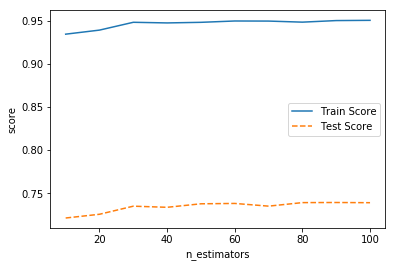

In [6]:
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [7]:
train_score = []; test_score=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = v_min_samples_leaf, random_state = 4)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [8]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.950,0.739
1,2,0.932,0.735
2,3,0.906,0.733
3,4,0.878,0.727
4,5,0.851,0.724
5,6,0.824,0.715
6,7,0.802,0.710
7,8,0.780,0.707
8,9,0.765,0.701
9,10,0.753,0.698


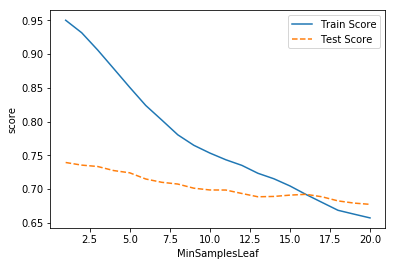

In [9]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesLeaf")
plt.legend()

In [10]:
train_score = []; test_score=[]

para_split = [n_split * 2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5, min_samples_split = v_min_samples_split, random_state = 4)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

In [11]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.851,0.724
1,6,0.851,0.724
2,8,0.851,0.724
3,10,0.851,0.724
4,12,0.840,0.724
5,14,0.827,0.721
6,16,0.813,0.718
7,18,0.799,0.711
8,20,0.787,0.708
9,22,0.775,0.703


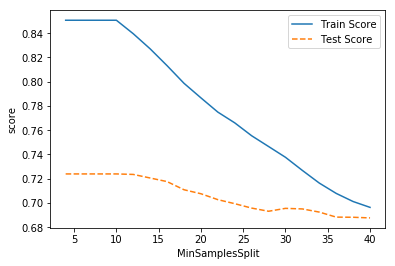

In [12]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("MinSamplesSplit")
plt.legend()

# para_split = 12

In [13]:
train_score = []; test_score=[]

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5, min_samples_split = 12, max_depth = v_max_depth, random_state = 4)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [14]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.539,0.535
1,2,0.675,0.673
2,3,0.759,0.706
3,4,0.803,0.720
4,5,0.827,0.721
5,6,0.836,0.723
6,7,0.839,0.724
7,8,0.839,0.724
8,9,0.839,0.724
9,10,0.840,0.724


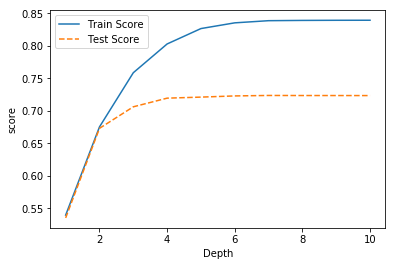

In [15]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("Depth")
plt.legend()

In [16]:
# para_depth = 6

In [17]:
rf_final = RandomForestRegressor(n_estimators = 130, min_samples_leaf = 5, min_samples_split = 12, 
                                 max_depth = 6, random_state = 61)

rf_final.fit(df_train_x, df_train_y)
print("Score on trainig set\t: %.3f" % rf_final.score(df_train_x, df_train_y))
print("Score on test set\t: %.3f" % rf_final.score(df_test_x, df_test_y))

rf_final

Score on trainig set	: 0.837
Score on test set	: 0.736


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=None,
           oob_score=False, random_state=61, verbose=0, warm_start=False)

In [18]:
sc_tr = []
sc_ts = []
inx = []

In [19]:

for i in range (0,100):
    rf_final = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 5, min_samples_split = 12, 
                                 max_depth = 6, random_state = i)
    rf_final.fit(df_train_x, df_train_y)
#    print("Score on trainig set\t: %.3f" % rf_final.score(df_train_x, df_train_y))
#    print("Score on test set\t: %.3f" % rf_final.score(df_test_x, df_test_y))
    
    sc_tr.append(rf_final.score(df_train_x, df_train_y))
    sc_ts.append(rf_final.score(df_test_x, df_test_y))
    inx.append(i)


In [20]:
df_rf = pd.DataFrame({"tr" : sc_tr, "ts" : sc_ts})

In [21]:
df_rf.head(5)

,tr,ts
0,0.837959,0.727124
1,0.835465,0.721944
2,0.841415,0.729229
3,0.837917,0.719051
4,0.835555,0.722991


In [22]:
df_rf["ts"].sort_values()

83    0.714103
48    0.716987
29    0.717766
44    0.717842
3     0.719051
18    0.719279
59    0.719376
42    0.719620
20    0.720129
14    0.720143
9     0.720212
31    0.720928
15    0.721019
13    0.721295
8     0.721302
51    0.721385
56    0.721406
52    0.721435
6     0.721511
86    0.721535
67    0.721566
30    0.721750
45    0.721819
1     0.721944
73    0.722128
32    0.722379
23    0.722659
94    0.722765
16    0.722781
4     0.722991
        ...   
7     0.727915
50    0.727952
46    0.728059
10    0.728349
93    0.729206
2     0.729229
84    0.729499
62    0.729542
36    0.730042
43    0.730183
99    0.730209
22    0.730549
85    0.730640
47    0.730865
11    0.730909
24    0.730928
60    0.731601
72    0.731783
69    0.731841
19    0.732194
71    0.732815
38    0.732828
66    0.732922
26    0.733239
33    0.733713
17    0.733767
91    0.735515
65    0.735856
76    0.736181
61    0.740852
Name: ts, Length: 100, dtype: float64